In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import glob

In [2]:
bins = 124

def calcular_histograma_medio_cv(image_paths, bins=512):
    # Inicializando os histogramas para R, G, B
    hist_r_total = np.zeros(bins)
    hist_g_total = np.zeros(bins)
    hist_b_total = np.zeros(bins)

    # Contagem de imagens processadas
    num_imagens = 0

    for caminho in image_paths:
        # Carrega a imagem usando OpenCV
        imagem = cv2.imread(caminho)

        if imagem is None:
            continue
        
        # Converte de BGR para RGB
        imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

        # Calcula os histogramas para cada canal com mais bins
        hist_r = cv2.calcHist([imagem], [0], None, [bins], [0, 256]).flatten()
        hist_g = cv2.calcHist([imagem], [1], None, [bins], [0, 256]).flatten()
        hist_b = cv2.calcHist([imagem], [2], None, [bins], [0, 256]).flatten()

        # Soma os histogramas para cálculo da média
        hist_r_total += hist_r
        hist_g_total += hist_g
        hist_b_total += hist_b

        num_imagens += 1

    # Calcula a média dos histogramas
    if num_imagens > 0:
        hist_r_medio = hist_r_total / num_imagens
        hist_g_medio = hist_g_total / num_imagens
        hist_b_medio = hist_b_total / num_imagens
        return hist_r_medio, hist_g_medio, hist_b_medio
    else:
        print("Nenhuma imagem válida foi encontrada no diretório.")
        return None, None, None

In [5]:

# Caminho da imagem
image_paths_slum = glob.glob("/Volumes/ssd/Doutorado/DATASET/detect slums/GMAPS_RGB_SP_2024/*_1.png")
image_paths_not_slum = glob.glob("/Volumes/ssd/Doutorado/DATASET/detect slums/GMAPS_RGB_SP_2024/*_0.png")

slum_hist_r_medio, slum_hist_g_medio, slum_hist_b_medio = calcular_histograma_medio_cv(image_paths_slum, bins=bins)
not_slum_hist_r_medio, not_slum_hist_g_medio, not_slum_hist_b_medio = calcular_histograma_medio_cv(image_paths_not_slum, bins=bins)


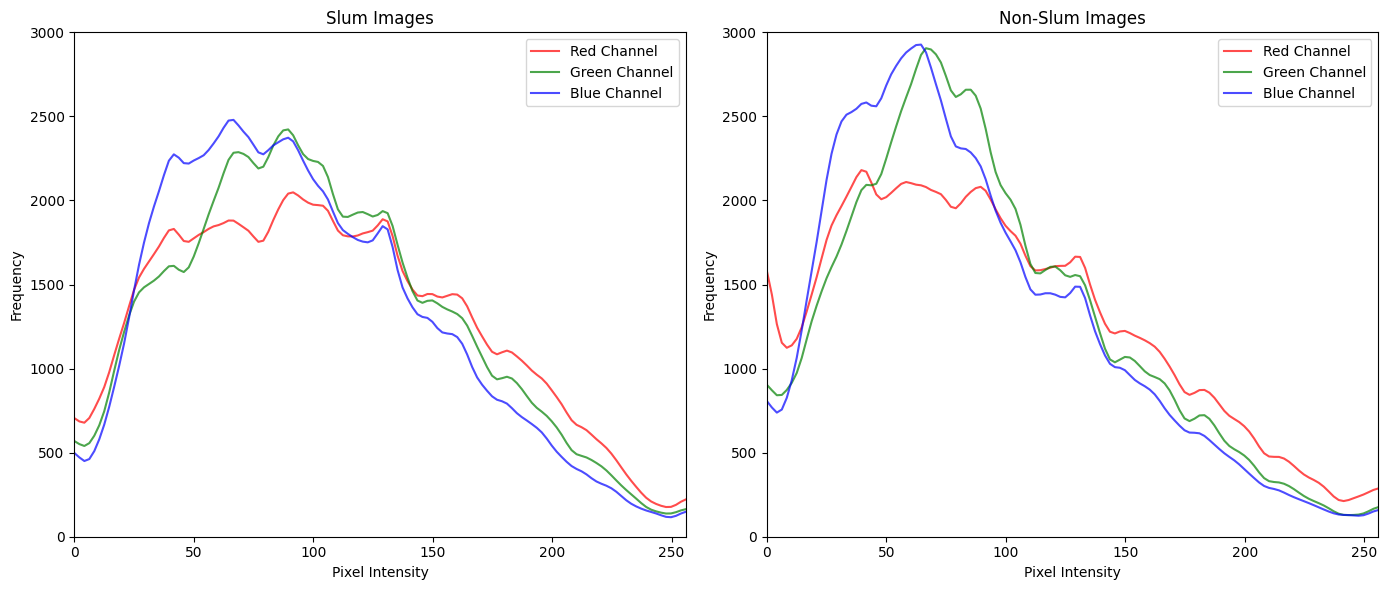

In [6]:
slum_hist_r_smooth = gaussian_filter1d(slum_hist_r_medio, sigma=2)
slum_hist_g_smooth = gaussian_filter1d(slum_hist_g_medio, sigma=2)
slum_hist_b_smooth = gaussian_filter1d(slum_hist_b_medio, sigma=2)

not_slum_hist_r_smooth = gaussian_filter1d(not_slum_hist_r_medio, sigma=2)
not_slum_hist_g_smooth = gaussian_filter1d(not_slum_hist_g_medio, sigma=2)
not_slum_hist_b_smooth = gaussian_filter1d(not_slum_hist_b_medio, sigma=2)

# Plotar histogramas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Eixo x ajustado com base no número de bins
x = np.linspace(0, 256, bins)

# Imagens de favelas
ax[0].plot(x, slum_hist_r_smooth, color='r', alpha=0.7, label='Red Channel')
ax[0].plot(x, slum_hist_g_smooth, color='g', alpha=0.7, label='Green Channel')
ax[0].plot(x, slum_hist_b_smooth, color='b', alpha=0.7, label='Blue Channel')
ax[0].set_title("Slum Images")
ax[0].set_xlabel("Pixel Intensity")
ax[0].set_ylabel("Frequency")
ax[0].legend()
ax[0].set_xlim([0, 256])
ax[0].set_ylim([0, 3000])

# Imagens não-favelas
ax[1].plot(x, not_slum_hist_r_smooth, color='r', alpha=0.7, label='Red Channel')
ax[1].plot(x, not_slum_hist_g_smooth, color='g', alpha=0.7, label='Green Channel')
ax[1].plot(x, not_slum_hist_b_smooth, color='b', alpha=0.7, label='Blue Channel')
ax[1].set_title("Non-Slum Images")
ax[1].set_xlabel("Pixel Intensity")
ax[1].set_ylabel("Frequency")
ax[1].legend()
ax[1].set_xlim([0, 256])
ax[1].set_ylim([0, 3000])

# Ajustar espaçamento e exibir
plt.tight_layout()
plt.show()